In [ ]:
!git clone https://github.com/jasonwei20/eda_nlp.git

Cloning into 'eda_nlp'...
remote: Enumerating objects: 396, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 396 (delta 45), reused 44 (delta 44), pack-reused 336 (from 1)
Receiving objects: 100% (396/396), 20.40 MiB | 9.04 MiB/s, done.
Resolving deltas: 100% (194/194), done.


In [ ]:
%cd eda_nlp

/content/eda_nlp


# Import necessary libraries

[nltk_data] Downloading package wordnet to /root/nltk_data...
/content/eda_nlp/code/eda.py:177: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  words = [word for word in words if word is not '']


   label                                           sentence
0      1  neil burger here succeeded in making the myste...
1      0  it is a visual rorschach test and i must have ...
2      0  the only way to tolerate this insipid brutally...
3      0  scores no points for originality wit or intell...
4      0  it would take a complete moron to foul up a sc...
Running experiments with 10.0% of the dataset...
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step - accuracy: 0.4430 - loss: 1.6098 - val_accuracy: 0.7000 - val_loss: 1.5381
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6256 - loss: 1.5074 - val_accuracy: 0.7400 - val_loss: 1.4690
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.5854 - loss: 1.4496 - val_accuracy: 0.7400 - val_loss: 1.4044
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.6399 - loss: 1.3741 - val_accuracy: 0.7600 - val_loss: 1.3382
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.6819 - loss: 1.3080 - val_accuracy: 0.8400 - val_loss: 1.2732
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.7184 - loss: 1.2254 - val_accuracy: 0.9000 - val_loss: 1.2115
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6924 - loss: 1.1849 - val_accuracy: 0.9200 - val_loss: 1.1539
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7328 - loss: 1.1295 - val_accuracy: 0.9200 - val_loss: 1.0981
Epoch 9/10

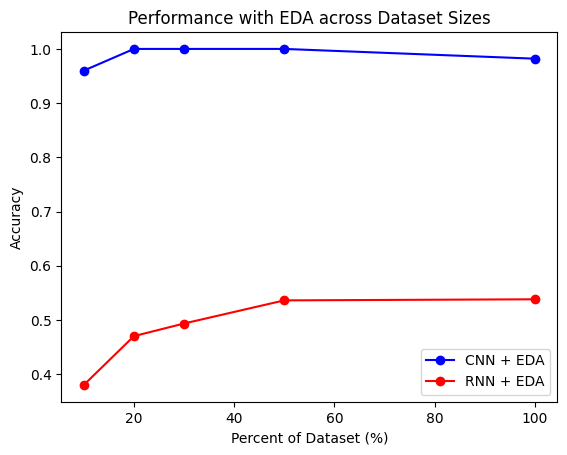

Running with alpha=0.05, n_aug=1...
Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.5348 - loss: 1.4932 - val_accuracy: 0.6650 - val_loss: 1.3379
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.5494 - loss: 1.2945 - val_accuracy: 0.7200 - val_loss: 1.1748
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.5260 - loss: 1.1396 - val_accuracy: 0.7550 - val_loss: 1.0472
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.6637 - loss: 1.0018 - val_accuracy: 0.7850 - val_loss: 0.9420
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.6917 - loss: 0.8980 - val_accuracy: 0.8550 - val_loss: 0.8534
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.7603 - loss: 0.7864 - val_accuracy: 0.8850 - val_loss: 0.7707
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.7752 - loss: 0.7095 - val_accuracy: 0.9200 - val_loss: 0.6800
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.8618 - los

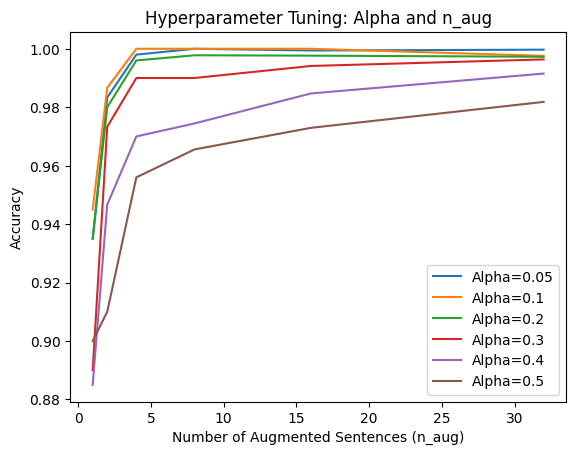

In [ ]:
import numpy as np
import pandas as pd
import nltk
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, LSTM
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sys

nltk.download('wordnet')

# Add the correct path to the Python path
sys.path.append('/content/eda_nlp/code')

# Import the EDA functions
from eda import eda

# Load the dataset
dataset_path = '/content/eda_nlp/data/sst2_train_500.txt'
data = pd.read_csv(dataset_path, delimiter='\t', header=None, names=['label', 'sentence'])

# Display first few rows of the dataset
print(data.head())

# Extract sentences and labels
X = data['sentence'].values
y = data['label'].values

# Tokenize the text data
tokenizer = Tokenizer(num_words=20000)  # Limiting vocabulary to 20,000 words
tokenizer.fit_on_texts(X)
X_tokens = tokenizer.texts_to_sequences(X)

# Padding the sequences to ensure uniform input size
max_len = 100  # You can adjust this value based on your dataset
X_padded = pad_sequences(X_tokens, maxlen=max_len, padding='post')

# Define fractions of the dataset to be used in experiments
fractions = [0.1, 0.2, 0.3, 0.5, 1.0]
cnn_results = {}
rnn_results = {}

# Model definition and training process
def train_model(X_train, y_train, X_val, y_val, model_type='cnn'):
    if model_type == 'cnn':
        model = Sequential([
            Embedding(input_dim=20000, output_dim=128, input_length=max_len),
            Conv1D(filters=64, kernel_size=5, activation='relu'),
            GlobalMaxPooling1D(),
            Dropout(0.6),
            Dense(units=10, activation='relu', kernel_regularizer=regularizers.l2(0.05)),
            Dropout(0.6),
            Dense(units=1, activation='sigmoid')
        ])
    elif model_type == 'rnn':
        model = Sequential([
            Embedding(input_dim=20000, output_dim=128, input_length=max_len),
            LSTM(128),
            Dropout(0.6),
            Dense(units=10, activation='relu', kernel_regularizer=regularizers.l2(0.05)),
            Dropout(0.6),
            Dense(units=1, activation='sigmoid')
        ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Define EarlyStopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

    # Train the model with EarlyStopping
    history = model.fit(X_train, y_train, epochs=10, batch_size=32,
                        validation_data=(X_val, y_val), callbacks=[early_stopping])

    return model, history

# Function to apply EDA, train, and evaluate models
def run_experiments():
    for fraction in fractions:
        print(f"Running experiments with {fraction*100}% of the dataset...")

        if fraction < 1.0:
            # Subsample the dataset
            X_train_frac, _, y_train_frac, _ = train_test_split(X_padded, y, train_size=fraction, random_state=42)
        else:
            # Use the entire dataset
            X_train_frac = X_padded
            y_train_frac = y

        # Apply EDA on the training set
        augmented_sentences = []
        augmented_labels = []

        for i in range(len(X_train_frac)):
            sentence = data['sentence'].iloc[i]
            label = y_train_frac[i]

            aug_sentences = eda(sentence, num_aug=4)  # Generate 4 augmented sentences per original
            augmented_sentences.extend(aug_sentences)
            augmented_labels.extend([label] * len(aug_sentences))

        # Tokenize and pad augmented sentences
        augmented_tokens = tokenizer.texts_to_sequences(augmented_sentences)
        X_train_augmented = pad_sequences(augmented_tokens, maxlen=max_len, padding='post')
        y_train_augmented = np.array(augmented_labels)

        # Split augmented data into training and validation sets
        X_train_aug, X_val_aug, y_train_aug, y_val_aug = train_test_split(X_train_augmented, y_train_augmented, test_size=0.2, random_state=42)

        # Train CNN model
        cnn_model, cnn_history = train_model(X_train_aug, y_train_aug, X_val_aug, y_val_aug, model_type='cnn')
        cnn_results[fraction] = cnn_model.evaluate(X_val_aug, y_val_aug)

        # Train RNN model
        rnn_model, rnn_history = train_model(X_train_aug, y_train_aug, X_val_aug, y_val_aug, model_type='rnn')
        rnn_results[fraction] = rnn_model.evaluate(X_val_aug, y_val_aug)

    return cnn_results, rnn_results

# Run the experiments and collect results
cnn_results, rnn_results = run_experiments()

# Plot the performance across different fractions
def plot_results(cnn_results, rnn_results):
    fractions_percent = [f * 100 for f in fractions]

    cnn_accuracies = [cnn_results[f][1] for f in fractions]
    rnn_accuracies = [rnn_results[f][1] for f in fractions]

    plt.plot(fractions_percent, cnn_accuracies, 'bo-', label='CNN + EDA')
    plt.plot(fractions_percent, rnn_accuracies, 'ro-', label='RNN + EDA')

    plt.xlabel('Percent of Dataset (%)')
    plt.ylabel('Accuracy')
    plt.title('Performance with EDA across Dataset Sizes')
    plt.legend()
    plt.show()

# Plot the results
plot_results(cnn_results, rnn_results)

# Hyperparameter tuning for alpha and n_aug
alphas = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
n_aug_values = [1, 2, 4, 8, 16, 32]

def hyperparameter_tuning(X_train_full, y_train_full):
    alpha_results = {}

    for alpha in alphas:
        for n_aug in n_aug_values:
            print(f"Running with alpha={alpha}, n_aug={n_aug}...")

            augmented_sentences = []
            augmented_labels = []

            for i in range(len(X_train_full)):
                sentence = data['sentence'].iloc[i]
                label = y_train_full[i]

                # Use the eda function with the correct parameters
                aug_sentences = eda(sentence, alpha_sr=alpha, alpha_ri=alpha, alpha_rs=alpha, p_rd=alpha, num_aug=n_aug)
                augmented_sentences.extend(aug_sentences)
                augmented_labels.extend([label] * len(aug_sentences))

            # Tokenize and pad augmented sentences
            augmented_tokens = tokenizer.texts_to_sequences(augmented_sentences)
            X_train_augmented = pad_sequences(augmented_tokens, maxlen=max_len, padding='post')
            y_train_augmented = np.array(augmented_labels)

            # Split augmented data into training and validation sets
            X_train_aug, X_val_aug, y_train_aug, y_val_aug = train_test_split(X_train_augmented, y_train_augmented, test_size=0.2, random_state=42)

            # Train and evaluate CNN model
            cnn_model, _ = train_model(X_train_aug, y_train_aug, X_val_aug, y_val_aug, model_type='cnn')
            alpha_results[(alpha, n_aug)] = cnn_model.evaluate(X_val_aug, y_val_aug)

    return alpha_results

# Run hyperparameter tuning using the full dataset
alpha_results = hyperparameter_tuning(X_padded, y)

# Plotting results of hyperparameter tuning
def plot_hyperparameter_tuning(alpha_results):
    for alpha in alphas:
        performances = [alpha_results[(alpha, n_aug)][1] for n_aug in n_aug_values]
        plt.plot(n_aug_values, performances, label=f'Alpha={alpha}')

    plt.xlabel('Number of Augmented Sentences (n_aug)')
    plt.ylabel('Accuracy')
    plt.title('Hyperparameter Tuning: Alpha and n_aug')
    plt.legend()
    plt.show()

# Plot the results of hyperparameter tuning
plot_hyperparameter_tuning(alpha_results)


# Train the Final model best parameters.

In [ ]:
# Final model training with the best hyperparameters
best_alpha = 0.1
best_n_aug = 16

# Apply EDA on the full dataset
augmented_sentences = []
augmented_labels = []

for i in range(len(X_padded)):  # Ensure X_padded is defined properly
    sentence = data['sentence'].iloc[i]
    label = y[i]

    # Generate augmented sentences
    aug_sentences = eda(sentence, alpha_sr=best_alpha, alpha_ri=best_alpha, alpha_rs=best_alpha, p_rd=best_alpha, num_aug=best_n_aug)
    augmented_sentences.extend(aug_sentences)
    augmented_labels.extend([label] * len(aug_sentences))

# Tokenize and pad augmented sentences
augmented_tokens = tokenizer.texts_to_sequences(augmented_sentences)
X_train_augmented = pad_sequences(augmented_tokens, maxlen=max_len, padding='post')
y_train_augmented = np.array(augmented_labels)

# Split data into training and validation sets
X_train_aug, X_val_aug, y_train_aug, y_val_aug = train_test_split(X_train_augmented, y_train_augmented, test_size=0.2, random_state=42)

# Train the CNN model
final_model, final_history = train_model(X_train_aug, y_train_aug, X_val_aug, y_val_aug, model_type='cnn')

# Evaluate the final model on the validation set
final_results = final_model.evaluate(X_val_aug, y_val_aug)
print(f"Final Validation Accuracy: {final_results[1] * 100:.2f}%")

# Save the model
final_model.save('final_model.keras')
print("Model saved successfully.")


Epoch 1/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.5485 - loss: 1.2267 - val_accuracy: 0.9782 - val_loss: 0.5802
Epoch 2/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.8984 - loss: 0.4491 - val_accuracy: 0.9982 - val_loss: 0.0924
Epoch 3/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.9534 - loss: 0.1704 - val_accuracy: 0.9994 - val_loss: 0.0457
Epoch 4/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 19s 46ms/step - accuracy: 0.9573 - loss: 0.1312 - val_accuracy: 0.9994 - val_loss: 0.0306
Epoch 5/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.9580 - loss: 0.1087 - val_accuracy: 0.9994 - val_loss: 0.0224
Epoch 6/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - accuracy: 0.9624 - loss: 0.1001 - val_accuracy: 0.9994 - val_loss: 0.0188
Epoch 7/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.9631 - loss: 0.0927 - val_accuracy: 0.9994 - val_loss: 0.0152
Epoch 8/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - accuracy: 0.9617 - loss: 0.0895 - 

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
final_model = load_model('final_model.keras')
print("Model loaded successfully from Keras format.")

# Evaluate on IMDB Test Data
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load IMDB data
(X_test, y_test), (_, _) = imdb.load_data(num_words=20000)

# Pad the sequences
X_test_padded = pad_sequences(X_test, maxlen=max_len, padding='post')

# Evaluate the model on the IMDB test set
test_results = final_model.evaluate(X_test_padded, y_test)
print(f"IMDB Test Accuracy: {test_results[1] * 100:.2f}%")


Model loaded successfully from Keras format.
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.4904 - loss: 2.0772
IMDB Test Accuracy: 48.98%


# Plot training & validation accuracy

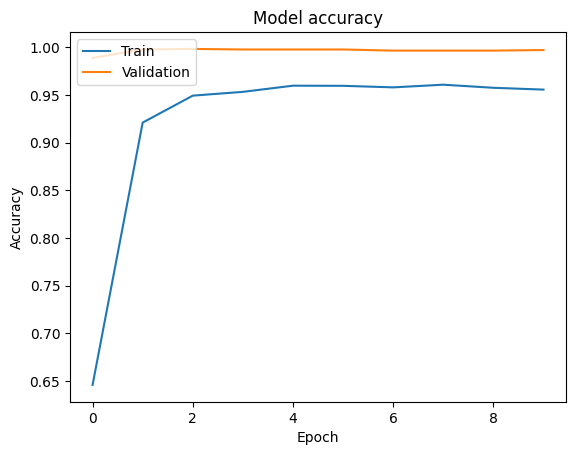

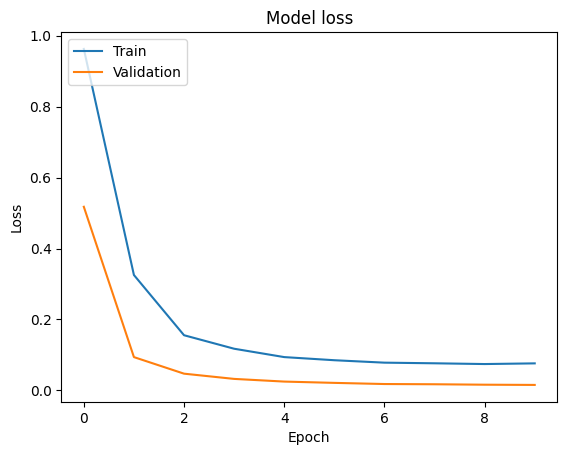

In [83]:
# Plot training & validation accuracy values
plt.plot(final_history.history['accuracy'])
plt.plot(final_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(final_history.history['loss'])
plt.plot(final_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
